In [1]:
#@title Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#@title Get Data

toce_data = pd.read_csv("https://raw.githubusercontent.com/fares-ipgp/toce/main/data/csv/toc_data.csv")
df = toce_data
df

,sample,depth_m,facies_num,bioturb,amb1,amb2,drx_qz,drx_pl,drx_fk,drx_ca,drx_py,drx_arc,drx_arc_i,drx_arc_is,drx_arc_cl,drx_arc_k,toc,if
0,PEVP1-15,207.0,12,0,0,1,6,3,1,1,1,3,32.0,19.0,49.0,0.0,NaN,NaN
1,PEVP1-14,205.0,12,0,0,1,6,3,1,3,1,3,35.0,16.0,49.0,0.0,0.09,0.84
2,PEVP1-13,202.0,12,0,0,1,6,3,1,2,1,3,39.0,11.0,49.0,0.0,NaN,NaN
3,PEVP1-11,197.0,12,0,0,1,6,3,1,3,1,3,30.0,15.0,55.0,0.0,NaN,NaN
4,PEVP1-10,195.0,12,0,0,1,6,3,1,3,0,3,28.0,21.0,51.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,IG 5,0.5,10,0,1,0,6,1,1,1,0,3,46.0,33.0,21.0,0.0,NaN,NaN
99,IG 4,0.5,10,0,1,0,6,1,1,1,1,3,60.0,19.0,21.0,0.0,0.07,0.90
100,IG 3,0.2,12,0,1,0,2,1,1,6,1,2,37.0,29.0,29.0,4.0,NaN,NaN
101,IG 2,0.1,12,0,1,0,2,2,1,6,1,2,77.0,18.0,3.0,2.0,NaN,NaN


In [3]:
#@title Select features
#@markdown Numerical values. Impute NaN as mean.
# bioturb	amb1	amb2
feature_names = []

columns_geological = [
                    #'depth_m',
                   	'facies_num',
                    'bioturb',
                   	'amb1',
                   	'amb2',
                    #'drx_qz',
                   	#'drx_pl',
                   	#'drx_fk',
                   	#'drx_ca',
                   	#'drx_py',
                   	#'drx_arc',
                   	#'drx_arc_i',
                   	#'drx_arc_is',
                   	#'drx_arc_cl',
                   	#'drx_arc_k'
                   ]

columns_analysis = [
                    #'depth_m',
                   	#'facies_num',
                    #'bioturb',
                   	#'amb1',
                   	#'amb2',
                    'drx_qz',
                   	'drx_pl',
                   	'drx_fk',
                   	'drx_ca',
                   	'drx_py',
                   	'drx_arc',
                   	'drx_arc_i',
                   	'drx_arc_is',
                   	'drx_arc_cl',
                   	'drx_arc_k'
                   ]

columns_numeric = [
                    #'depth_m',
                   	'facies_num',
                    'bioturb',
                   	'amb1',
                   	'amb2',
                    'drx_qz',
                   	'drx_pl',
                   	'drx_fk',
                   	'drx_ca',
                   	'drx_py',
                   	'drx_arc',
                   	'drx_arc_i',
                   	'drx_arc_is',
                   	'drx_arc_cl',
                   	'drx_arc_k'
                   ]

# Numeric feature names
feature_names.extend(columns_numeric)

# Mean imputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df[columns_numeric] = imp.fit_transform(df[columns_numeric])
df

,sample,depth_m,facies_num,bioturb,amb1,amb2,drx_qz,drx_pl,drx_fk,drx_ca,drx_py,drx_arc,drx_arc_i,drx_arc_is,drx_arc_cl,drx_arc_k,toc,if
0,PEVP1-15,207.0,12.0,0.0,0.0,1.0,6.0,3.0,1.0,1.0,1.0,3.0,32.0,19.0,49.0,0.0,NaN,NaN
1,PEVP1-14,205.0,12.0,0.0,0.0,1.0,6.0,3.0,1.0,3.0,1.0,3.0,35.0,16.0,49.0,0.0,0.09,0.84
2,PEVP1-13,202.0,12.0,0.0,0.0,1.0,6.0,3.0,1.0,2.0,1.0,3.0,39.0,11.0,49.0,0.0,NaN,NaN
3,PEVP1-11,197.0,12.0,0.0,0.0,1.0,6.0,3.0,1.0,3.0,1.0,3.0,30.0,15.0,55.0,0.0,NaN,NaN
4,PEVP1-10,195.0,12.0,0.0,0.0,1.0,6.0,3.0,1.0,3.0,0.0,3.0,28.0,21.0,51.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,IG 5,0.5,10.0,0.0,1.0,0.0,6.0,1.0,1.0,1.0,0.0,3.0,46.0,33.0,21.0,0.0,NaN,NaN
99,IG 4,0.5,10.0,0.0,1.0,0.0,6.0,1.0,1.0,1.0,1.0,3.0,60.0,19.0,21.0,0.0,0.07,0.90
100,IG 3,0.2,12.0,0.0,1.0,0.0,2.0,1.0,1.0,6.0,1.0,2.0,37.0,29.0,29.0,4.0,NaN,NaN
101,IG 2,0.1,12.0,0.0,1.0,0.0,2.0,2.0,1.0,6.0,1.0,2.0,77.0,18.0,3.0,2.0,NaN,NaN


In [4]:
#@title Target { run: "auto" }

columns_target = ['toc','if']
columns_label = ['sample']


In [5]:
#@title Preprocessing  
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

def build_pre_cols_num(cols):
  '''
  Builds column processors
  '''
  num = StandardScaler()
  pre_cols = ColumnTransformer(
      transformers=[
          ('num', num, columns_numeric),
          ])

  return pre_cols, columns_numeric

# Build column processor
pre_cols_num, _ = build_pre_cols_num(columns_numeric)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 103 samples in 0.000s...
[t-SNE] Computed neighbors for 103 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 103 / 103
[t-SNE] Mean sigma: 2.328713
[t-SNE] KL divergence after 250 iterations with early exaggeration: 1.156997
[t-SNE] KL divergence after 4250 iterations: 0.073515


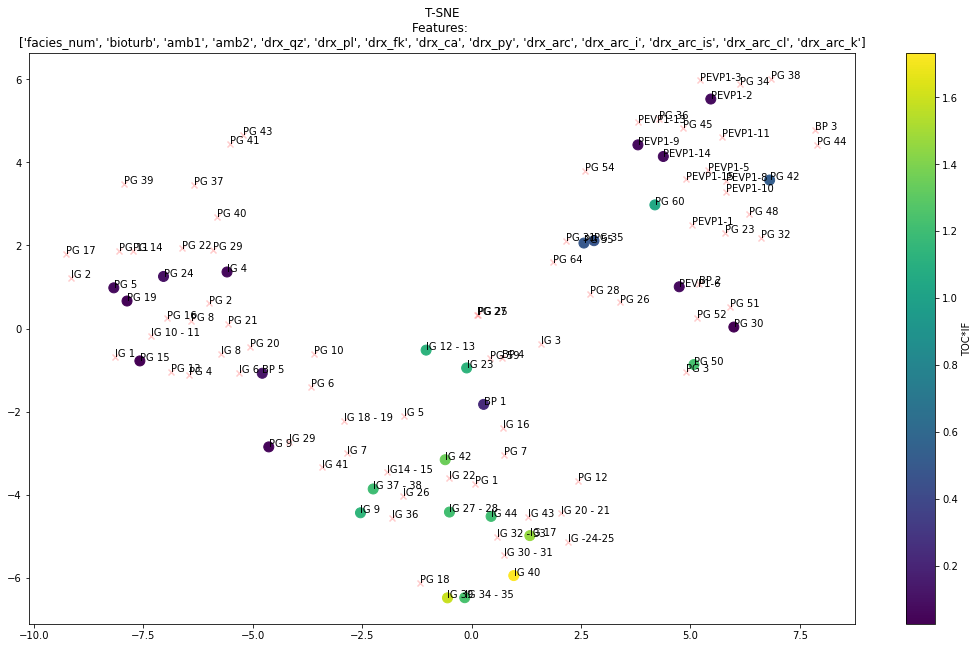

In [6]:
#@title TSNE TOC*IF - All features { run: "auto" }

from sklearn.manifold import TSNE

X = df[columns_numeric]
y = df[columns_target]

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=10000,learning_rate=0.01,early_exaggeration=1,n_iter_without_progress=200, metric='minkowski')
tsne_results = tsne.fit_transform(X)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
current_cmap = plt.cm.get_cmap()
current_cmap.set_bad(color='red')

im=ax.scatter(tsne_results[:,0],tsne_results[:,1],c='red', marker='x', alpha=0.2)
im=ax.scatter(tsne_results[:,0],tsne_results[:,1],cmap=current_cmap, c=y['toc']*y['if'],s=100)
cbar=fig.colorbar(im, ax=ax)
cbar.set_label('TOC*IF')

plt.title("T-SNE\nFeatures: \n"+str(columns_numeric))

for i, txt in enumerate(df['sample']):
     ax.annotate(txt  , (tsne_results[i,0], tsne_results[i,1]))


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 103 samples in 0.001s...
[t-SNE] Computed neighbors for 103 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 103 / 103
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 1.495436
[t-SNE] KL divergence after 10000 iterations: -1.432691


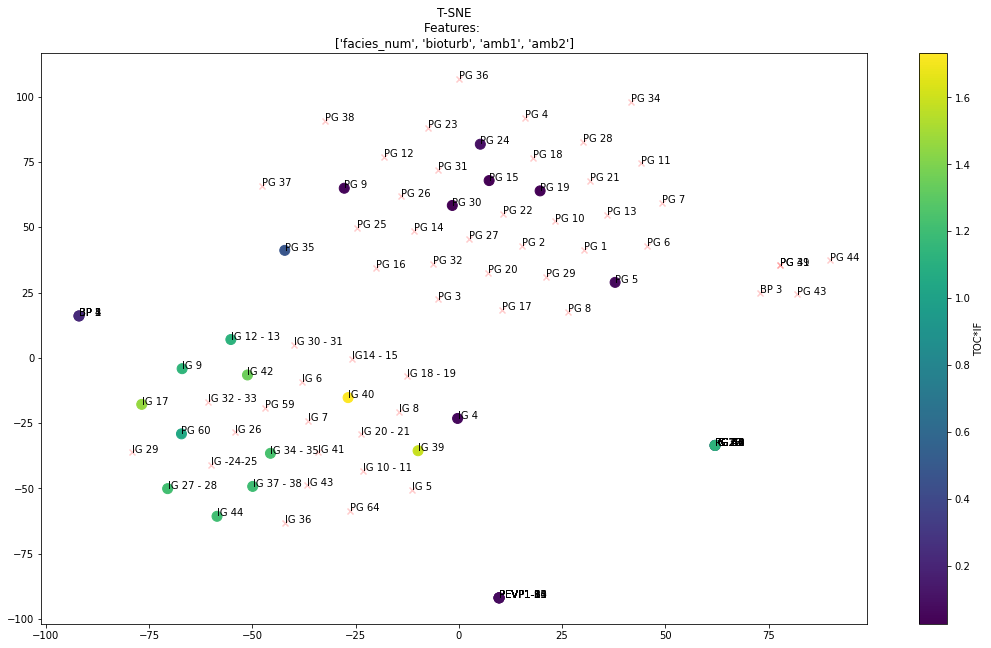

In [7]:
#@title TSNE TOC*IF - Geological features { run: "auto" }

from sklearn.manifold import TSNE

X = df[columns_geological]
y = df[columns_target]

tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=10000,learning_rate=0.01,early_exaggeration=1,n_iter_without_progress=200, metric='minkowski')
tsne_results = tsne.fit_transform(X)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
current_cmap = plt.cm.get_cmap()
current_cmap.set_bad(color='red')

im=ax.scatter(tsne_results[:,0],tsne_results[:,1],c='red', marker='x', alpha=0.2)
im=ax.scatter(tsne_results[:,0],tsne_results[:,1],cmap=current_cmap, c=y['toc']*y['if'],s=100)
cbar=fig.colorbar(im, ax=ax)
cbar.set_label('TOC*IF')

plt.title("T-SNE\nFeatures: \n"+str(columns_geological))

for i, txt in enumerate(df['sample']):
     ax.annotate(txt  , (tsne_results[i,0], tsne_results[i,1]))


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 103 samples in 0.001s...
[t-SNE] Computed neighbors for 103 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 103 / 103
[t-SNE] Mean sigma: 2.339322
[t-SNE] KL divergence after 250 iterations with early exaggeration: 1.164352
[t-SNE] KL divergence after 3350 iterations: 0.097443


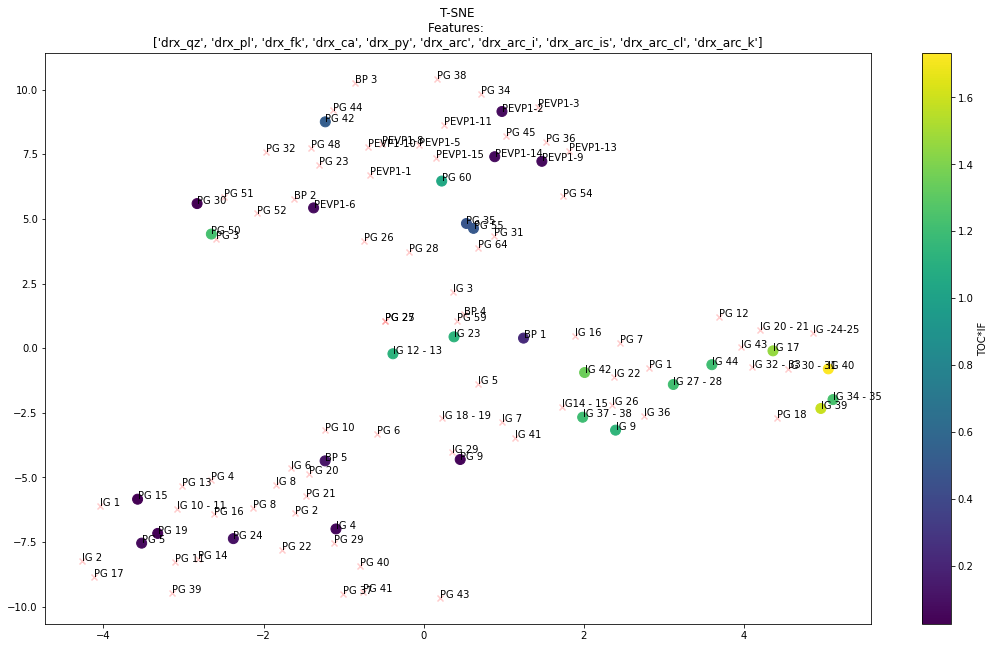

In [8]:
#@title TSNE TOC*IF - Analysis features { run: "auto" }

from sklearn.manifold import TSNE

X = df[columns_analysis]
y = df[columns_target]

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=10000,learning_rate=0.01,early_exaggeration=1,n_iter_without_progress=200, metric='minkowski')
tsne_results = tsne.fit_transform(X)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
current_cmap = plt.cm.get_cmap()
current_cmap.set_bad(color='red')

im=ax.scatter(tsne_results[:,0],tsne_results[:,1],c='red', marker='x', alpha=0.2)
im=ax.scatter(tsne_results[:,0],tsne_results[:,1],cmap=current_cmap, c=y['toc']*y['if'],s=100)
cbar=fig.colorbar(im, ax=ax)
cbar.set_label('TOC*IF')

plt.title("T-SNE\nFeatures: \n"+str(columns_analysis))

for i, txt in enumerate(df['sample']):
     ax.annotate(txt  , (tsne_results[i,0], tsne_results[i,1]))


In [9]:
#@title Metric Functions { run: "auto" }

#Validation
from sklearn.model_selection import KFold

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

# Plot
import seaborn as sns

def df_merge_shuffle(dfs: list, shuffle=True) -> pd.DataFrame:
  '''
  Given a list of datasets, merge, shuffle and reindex them
  '''
  df_out = None

  for idx, df in enumerate(dfs):
    if idx == 0:
      df_out = df
    else:
      df_out = pd.concat([df_out, df], axis=0)
  
  if shuffle:
    df_out = df_out.sample(frac=1).reset_index(drop=True)
  return df_out 


def calc_metrics(y_true, y_pred) -> dict:
  '''
  Evaluate metrics and return them in a dictionary
  '''
  metrics = {}
  metrics['accuracy']=accuracy_score(y_true,y_pred)
  metrics['f1_score']=f1_score(y_true,y_pred)
  metrics['precision']=precision_score(y_true,y_pred)
  metrics['recall']=recall_score(y_true,y_pred)

  return metrics

def eval_metrics(clf, X_train, y_train, X_val, y_val ) -> dict:
  
  # Trining metrics
  y_pred = clf.predict(X_train)
  train_metrics = calc_metrics(y_train,y_pred)
    
  # Convert to dataset
  df_metrics_train = pd.DataFrame.from_dict([train_metrics], orient='columns')
  df_metrics_train['data'] = 'train'

  # Validation metrics
  y_pred = clf.predict(X_val)
  val_metrics = calc_metrics(y_val,y_pred)
  
  # Convert to dataset
  df_metrics_val = pd.DataFrame.from_dict([val_metrics], orient='columns')
  df_metrics_val['data'] = 'val'

  # Merge data
  df_metrics = df_merge_shuffle([df_metrics_train, df_metrics_val])

  return df_metrics

def eval_kfold(clf, X, y, k, fit=True):

  # Create KFold splitter
  kf = KFold(n_splits=k,shuffle=True)

  # Init dictionaries to store results
  metrics=[]

  # Iterate over splits
  for split, indexes in enumerate(kf.split(X)):

    # Unpack indexes
    train_index, val_index = indexes 
    
    # Split dataset
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Fit model
    if fit:
      clf.fit(X_train, y_train)

    # Calculate metrics
    df_m = eval_metrics(clf, X_train, y_train , X_val, y_val)
    df_m['split']=split
    metrics.append(df_m)

  return  df_merge_shuffle(metrics,shuffle=False)

def plot_metrics(df_metrics,ax = None):
  '''
  Plots a dataframe of metrics
  '''  
  if ax is None: 
    ax = plt.gca()

  sns.boxplot(x=df_metrics.metric, y=df_metrics.value, hue=df_metrics.data,palette="colorblind")


In [31]:
#@title Prepare data for training / testing { run: "auto" }

# Feature column names
columns_features = columns_numeric 

# split in labeled/unlabeled 
df_labeled=df.dropna()
df_unlabeled=df[df.isna().any(axis=1)]

labels=df_labeled[columns_label].reset_index()
X = df_labeled[columns_features].reset_index()
y = df_labeled[columns_target].reset_index()

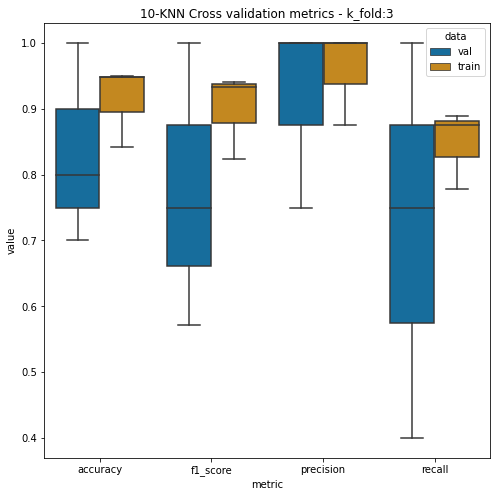

In [43]:
#@title Classifier { run: "auto" }

# Classifiers
from sklearn import neighbors 
from sklearn import ensemble
from sklearn import svm

# Feature column names
columns_features = columns_numeric 

# split in labeled/unlabeled 
df_labeled=df.dropna()

labels=df_labeled[columns_label].reset_index()
X = df_labeled[columns_features].reset_index()
y = df_labeled[columns_target].reset_index()

# Create classifier
knn=10
clf = neighbors.KNeighborsClassifier(knn, weights='uniform',metric='minkowski')
clf = ensemble.RandomForestClassifier(1000,max_depth=10,min_samples_split=10,min_samples_leaf=5)

# Evaluate metrics
k_fold=3
metrics = eval_kfold(clf,pre_cols_num.fit_transform(X), y['toc']>1, k_fold)

# Convert from wide to long format
metrics_long = metrics.melt(id_vars=["data", "split"], 
        var_name="metric", 
        value_name="value")

# Plot result
fig = plt.gcf()
fig.set_size_inches(8,8)
ax = plt.gca()
ax.set_title(f'{knn:d}-KNN Cross validation metrics - k_fold:{k_fold:d}')
plot_metrics(metrics_long)


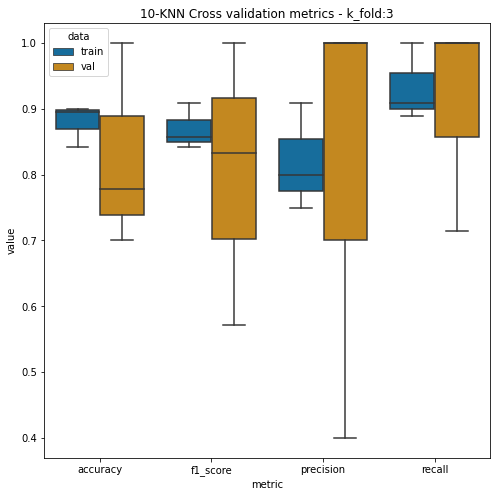

In [41]:
#@title Data augmentation { run: "auto" }

# split in labeled/unlabeled 
df_labeled=df.dropna()
df_unlabeled=df[df.isna().any(axis=1)]

labels=df_labeled[columns_label].reset_index()
X = df_labeled[columns_features].reset_index()
y = df_labeled[columns_target].reset_index()
X_unlabeled = df_unlabeled[columns_numeric]

k= 3

# Create KFold splitter
kf = KFold(n_splits=k,shuffle=True)

X = df_labeled.reset_index()[columns_features]
y = df_labeled.reset_index()['toc']>1
X_unlabeled = df_unlabeled[columns_numeric].reset_index()

# Init dictionaries to store results
metrics=[]

# Iterate over splits
for split, indexes in enumerate(kf.split(X)):

  # Unpack indexes
  train_index, val_index = indexes 

  # Split dataset
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]

  # Fit model 1
  clf1 = neighbors.KNeighborsClassifier(1, weights='uniform',p=2)
  clf1.fit(pre_cols_num.fit_transform(X_train), y_train)

  # Predict targets for unlabeled 
  y_augm=clf1.predict(pre_cols_num.fit_transform(X_unlabeled))

  # Fit model 2
  clf2 = ensemble.RandomForestClassifier(1000,max_depth=10,min_samples_split=10,min_samples_leaf=5)
  clf2.fit(pre_cols_num.fit_transform(X_unlabeled),y_augm)

  # Calculate metrics for model 2
  df_m = eval_metrics(clf2, pre_cols_num.fit_transform(X_train), y_train , pre_cols_num.fit_transform(X_val), y_val)
  df_m['split']=split
  metrics.append(df_m)

metrics= df_merge_shuffle(metrics,shuffle=False)

# Convert from wide to long format
metrics_long = metrics.melt(id_vars=["data", "split"], 
        var_name="metric", 
        value_name="value")

# Plot result
fig = plt.gcf()
fig.set_size_inches(8,8)
ax = plt.gca()
ax.set_title(f'{knn:d}-KNN Cross validation metrics - k_fold:{k_fold:d}')
plot_metrics(metrics_long)
